Tutorial 

In [37]:
import pandas as pd
import geopandas as gpd
import cbsodata
import pyogrio

# Find out which columns are available
metadata = pd.DataFrame(cbsodata.get_meta('83765NED', 'DataProperties'))

In [38]:
metadata

,odata.type,ID,Position,ParentID,Type,Key,Title,Description,MapYear,Datatype,Unit,Decimals,Default,PresentationType
0,Cbs.OData.GeoDetail,0,0.0,NaN,GeoDetail,WijkenEnBuurten,Wijken en buurten,,2017.0,NaN,NaN,NaN,NaN,NaN
1,Cbs.OData.TopicGroup,1,NaN,NaN,TopicGroup,,Regioaanduiding,De gemeenten in Nederland zijn onderverdeeld i...,NaN,NaN,NaN,NaN,NaN,NaN
2,Cbs.OData.Topic,2,1.0,1.0,Topic,Gemeentenaam_1,Gemeentenaam,De naam van de bestuurlijke gemeente. Deze naa...,NaN,String,naam,0.0,Impossible,
3,Cbs.OData.Topic,3,2.0,1.0,Topic,SoortRegio_2,Soort regio,"De gekozen regioaanduiding betreft: Gemeente, ...",NaN,String,omschrijving,0.0,Impossible,
4,Cbs.OData.Topic,4,3.0,1.0,Topic,Codering_3,Codering,"Gemeentecode heeft 4 posities, voorafgegaan do...",NaN,String,code,0.0,Impossible,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Cbs.OData.Topic,142,105.0,140.0,Topic,Omgevingsadressendichtheid_105,Omgevingsadressendichtheid,De omgevingsadressendichtheid (OAD) van een bu...,NaN,Long,per km²,0.0,Impossible,Relative
143,Cbs.OData.TopicGroup,143,NaN,NaN,TopicGroup,,Criminaliteit,Bevat cijfers over vermogensmisdrijven die doo...,NaN,NaN,NaN,NaN,NaN,NaN
144,Cbs.OData.Topic,144,106.0,143.0,Topic,TotaalDiefstalUitWoningSchuurED_106,Totaal diefstal uit woning/schuur/e.d.,Deze regel geeft het totaal weer van 'Diefstal...,NaN,Long,per 1 000 inwoners,0.0,Impossible,Relative
145,Cbs.OData.Topic,145,107.0,143.0,Topic,VernielingMisdrijfTegenOpenbareOrde_107,"Vernieling, misdrijf tegen openbare orde",None,NaN,Long,per 1 000 inwoners,0.0,Impossible,Relative


In [39]:
# Download birth rates and delete spaces from regional identifiers
data = pd.DataFrame(cbsodata.get_data('83765NED', select = ['WijkenEnBuurten', 'Codering_3', 'GeboorteRelatief_25']))
data['Codering_3'] = data['Codering_3'].str.strip()

In [40]:
data

,WijkenEnBuurten,Codering_3,GeboorteRelatief_25
0,Nederland,NL00,9
1,Aa en Hunze,GM1680,6
2,Wijk 00 Annen,WK168000,9
3,Annen,BU16800000,10
4,Verspreide huizen Annen,BU16800009,0
...,...,...,...
16662,Gerenbroek,BU01935150,11
16663,Oude Mars,BU01935160,0
16664,Wijk 52 Soestweteringlanden,WK019352,10
16665,Windesheim,BU01935200,10


In [49]:
geodata_url = 'https://service.pdok.nl/cbs/gebiedsindelingen/2017/wfs/v1_0?request=GetFeature&service=WFS&version=1.1.0&outputFormat=application%2Fjson%3B%20subtype%3Dgeojson&typeName=gebiedsindelingen:gemeente_gegeneraliseerd'
municipal_boundaries = gpd.read_file(filename='GeoJSON:https://service.pdok.nl/cbs/gebiedsindelingen/2021/wfs/v1_0?request=GetFeature&service=WFS&version=1.1.0&outputFormat=json&typeName=gebiedsindelingen:gemeente_gegeneraliseerd', engine="pyogrio")


In [50]:
# Link data from Statistics Netherlands to geodata
municipal_boundaries = pd.merge(municipal_boundaries, data,
                               left_on = "statcode", 
                               right_on = "Codering_3")

Text(0.5, 1.0, 'Birth rate per 1,000 population, 2017')

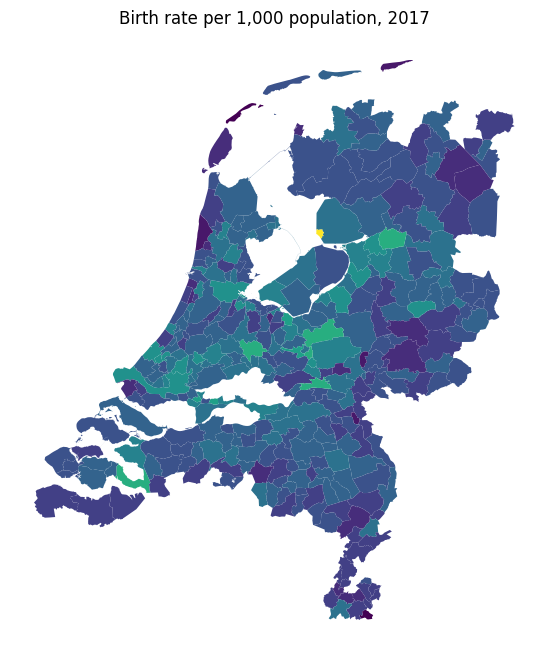

In [51]:
# Create a thematic map
p = municipal_boundaries.plot(column='GeboorteRelatief_25', 
                             figsize = (10,8))
p.axis('off')
p.set_title('Birth rate per 1,000 population, 2017')


Own Data

In [17]:
import pandas as pd
import geopandas as gpd
import cbsodata

# Find out which columns are available
metadata = pd.DataFrame(cbsodata.get_meta('85826NED', 'DataProperties'))


In [18]:
metadata

,odata.type,ID,Position,ParentID,Type,Key,Title,Description,MapYear,ReleasePolicy,Datatype,Unit,Decimals,Default,PresentationType
0,Cbs.OData.Dimension,0,0.0,NaN,Dimension,Persoonskenmerken,Persoonskenmerken,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cbs.OData.GeoDimension,1,1.0,NaN,GeoDimension,RegioS,Regio's,,2023.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Cbs.OData.TimeDimension,2,2.0,NaN,TimeDimension,Perioden,Perioden,,NaN,True,NaN,NaN,NaN,NaN,NaN
3,Cbs.OData.Topic,3,3.0,NaN,Topic,BeroepsEnNietBeroepsbevolking_1,Beroeps- en niet-beroepsbevolking,"Personen die tot de werkzame, de werkloze of d...",NaN,NaN,Long,x 1 000,0.0,Missing,Absolute
4,Cbs.OData.TopicGroup,4,NaN,NaN,TopicGroup,,Beroepsbevolking,Personen:\r\n- die betaald werk hebben (werkza...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Cbs.OData.Topic,5,4.0,4.0,Topic,Beroepsbevolking_2,Beroepsbevolking,Personen:\r\n- die betaald werk hebben (werkza...,NaN,NaN,Long,x 1 000,0.0,Missing,Absolute
6,Cbs.OData.TopicGroup,6,NaN,4.0,TopicGroup,,Werkzame beroepsbevolking,Personen die betaald werk hebben.\r\n\r\nDeze ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Cbs.OData.Topic,7,5.0,6.0,Topic,WerkzameBeroepsbevolking_3,Werkzame beroepsbevolking,Personen die betaald werk hebben.\r\n\r\nDeze ...,NaN,NaN,Long,x 1 000,0.0,Missing,Absolute
8,Cbs.OData.TopicGroup,8,NaN,6.0,TopicGroup,,Positie in de werkkring,Indeling van de werkzame beroepsbevolking naar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Cbs.OData.Topic,9,6.0,8.0,Topic,Werknemer_4,Werknemer,Een persoon die in een arbeidsovereenkomst afs...,NaN,NaN,Long,x 1 000,0.0,Missing,Absolute


In [25]:
# Download birth rates and delete spaces from regional identifiers
data = pd.DataFrame(cbsodata.get_data('85826NED', select = ['RegioS	','WerkzameBeroepsbevolking_3']))
#data['WerkzameBeroepsbevolking_3'] = data['WerkzameBeroepsbevolking_3'].str.strip()

In [26]:
# Retrieve data with municipal boundaries from PDOK
municipal_boundaries = gpd.read_file(filename='GeoJSON:https://service.pdok.nl/cbs/gebiedsindelingen/2021/wfs/v1_0?request=GetFeature&service=WFS&version=1.1.0&outputFormat=json&typeName=gebiedsindelingen:gemeente_gegeneraliseerd', engine="pyogrio")

In [27]:
# Link data from Statistics Netherlands to geodata
municipal_boundaries = pd.merge(municipal_boundaries, data,
                               left_on = "statcode", 
                               right_on = "RegioS")

c:\Users\juliu\VSCODE\VSCODE\inkar-indicators\.venv\lib\site-packages\geopandas\plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Text(0.5, 1.0, 'Birth rate per 1,000 population, 2017')

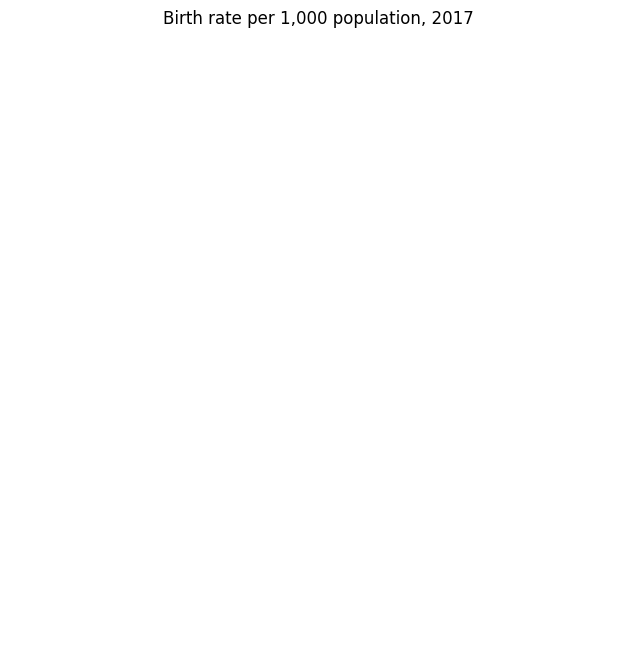

In [24]:
# Create a thematic map
p = municipal_boundaries.plot(column='WerkzameBeroepsbevolking_3', 
                             figsize = (10,8))
p.axis('off')
p.set_title('Birth rate per 1,000 population, 2017')